# **<h1><center> Production EDA </center></h1>**

## Import Packages

In [9]:
import pandas as pd
import sqlite3
import plotly.io as pio
import numpy as np
pd.set_option('display.max_columns', None)
from statistics import mean 
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.max_rows",1000)
pd.options.display.precision = 1

### Connect to SQlite3 DataBase

In [10]:
%load_ext sql
%sql sqlite:////Users/john.odonnell/Python/Web_Scraping/NDIC/Well_DataBase.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### View Tables

In [11]:
%%sql 

SELECT 
    name 
FROM sqlite_master 
WHERE type ='table';

 * sqlite:////Users/john.odonnell/Python/Web_Scraping/NDIC/Well_DataBase.db
Done.


[('prod_table',),
 ('header_table',),
 ('prod_table_clean',),
 ('header_table_clean',)]

## Import Production data

In [12]:
query = %sql SELECT * FROM prod_table_clean WHERE Days > 0

df_production = query.DataFrame()
df_production.set_index('UWI',inplace=True)
df_production['Date'] = pd.to_datetime(df_production['Date'], infer_datetime_format=True)
df_production.describe().transpose()

 * sqlite:////Users/john.odonnell/Python/Web_Scraping/NDIC/Well_DataBase.db
Done.


count     mean      std   min      25%      50%      75%  \
Days  1169929.000   27.510    6.528 1.000   28.000   30.000   31.000   
Oil   1169929.000 3197.343 4686.067 0.000  877.000 1704.000 3436.000   
Water 1169929.000 2963.520 5480.394 0.000  615.000 1404.000 3038.000   
Gas   1169929.000 5216.232 8703.746 0.000 1109.000 2465.000 5250.000   
Fluid 1169929.000 6160.863 9239.787 0.000 1799.000 3323.000 6525.000   
WOR   1165999.000      inf      NaN 0.000    0.418    0.845    1.525   
GOR   1167513.000      inf      NaN 0.000    0.872    1.373    2.229   

             max  
Days      31.000  
Oil   136924.000  
Water 650679.000  
Gas   200369.000  
Fluid 652381.000  
WOR          inf  
GOR          inf

## Import Header data

In [13]:
query = %sql SELECT * FROM header_table_clean

df_header = query.DataFrame()

# Set Index and view shape
df_header.set_index('UWI',inplace=True)
df_header[['Completion_Date','Spud_Date']] = df_header[['Completion_Date','Spud_Date']].apply(pd.to_datetime, errors='coerce')
df_header.sample(5)

 * sqlite:////Users/john.odonnell/Python/Web_Scraping/NDIC/Well_DataBase.db
Done.


File_Number                Well_Name Well_Type Well_Status  \
UWI                                                                          
33053079640000        33461      MESA 152-94-16A-21H        OG           A   
33061009220000        17800  RS-STATE E-155-90 36H-1        OG           A   
33089006900000        22372          3J TRUST 24-8PH        OG           A   
33053060990000        28818   SIMPSON 151-102-5-8-2H        OG           A   
33053037720000        21509         FOREST 26-35 #1H        OG           A   

                       Location  Latitude  Longitude  \
UWI                                                    
33053079640000   NENW 16-152-94    47.991   -102.719   
33061009220000   SESE 36-155-90    48.198   -102.183   
33089006900000    SESW 8-140-99    46.950   -103.205   
33053060990000   LOT1 5-151-102    47.934   -103.759   
33053037720000  NENW 26-152-101    47.963   -103.575   

                                  Current_Operator Completion_Date  \
UWI                                                                  
33053079640000  ENERPLUS RESOURCES USA CORPORATION      2018-02-25   
33061009220000     HESS BAKKEN INVESTMENTS II, LLC      2009-03-07   
33089006900000     WHITING OIL AND GAS CORPORATION      2012-06-19   
33053060990000              NINE POINT ENERGY, LLC      2015-01-19   
33053037720000                   EQUINOR ENERGY LP      2012-03-01   

               Total_Depth  Spud_Date Perf_Interval  Cum_Oil  Cum_Gas  \
UWI                                                                     
33053079640000       20465 2017-06-18  11338 -19317   220644   434063   
33061009220000       14786 2009-01-01    9530-14786   414897   151508   
33089006900000       21070 2012-04-07   11069-21070   292459   408076   
33053060990000       20700 2014-09-06   11315-20705   224696   300392   
33053037720000       20477 2011-11-07   10946-20477   306111   404005   

                Cum_Water      SHL_X       SHL_Y  Vintage_Year  Top_Perf  \
UWI                                                                        
33053079640000      61235 670161.908 5317820.446      2018.000 11338.000   
33061009220000     162540 709339.757 5342173.806      2009.000  9530.000   
33089006900000     106929 636587.850 5201125.825      2012.000 11069.000   
33053060990000     466377 592682.139 5309757.574      2015.000 11315.000   
33053037720000     319892 606393.240 5313178.883      2012.000 10946.000   

                Bottom_Perf  Operator                      delete  \
UWI                                                                 
33053079640000    19317.000  ENERPLUS   RESOURCES USA CORPORATION   
33061009220000    14786.000      HESS  BAKKEN INVESTMENTS II, LLC   
33089006900000    21070.000   WHITING     OIL AND GAS CORPORATION   
33053060990000    20705.000      NINE           POINT ENERGY, LLC   
33053037720000    20477.000   EQUINOR                   ENERGY LP   

                Perforated_Length Direction         TRS Section Township  \
UWI                                                                        
33053079640000           7979.000      NENW   16-152-94      16      152   
33061009220000           5256.000      SESE   36-155-90      36      155   
33089006900000          10001.000      SESW    8-140-99       8      140   
33053060990000           9390.000      LOT1   5-151-102       5      151   
33053037720000           9531.000      NENW  26-152-101      26      152   

               Range   Block  
UWI                           
33053079640000    94   15294  
33061009220000    90   15590  
33089006900000    99   14099  
33053060990000   102  151102  
33053037720000   101  152101

## Define Functions

In [11]:
def STREAM_PLOT(dataframe, production_dataframe, material, width, height, variable_dict = {'0-99999999':None}, rate_cum = 0, averages = 0, cumulative = 1,
                line_width = 1, variable = df_header.iloc[:,0].name, all_streams = 1):
    
    fig = go.Figure(layout={'height':height,'width':width})
    
    if averages == 1:
        fig.update_layout(xaxis_title="Producing Days")
        for item in variable_dict.keys():
            low = float(item.split('-')[0])
            high = float(item.split('-')[1]) 
            df_temp = dataframe[dataframe[variable].between(low,high)]
            if len(df_temp) >= 1:       
                
                if material in ['WOR','GOR']:
                    average_list = []
                    for m in [i for i in range(1,27,1)]:
                        prod_list = []
                        for uwi in df_temp.index.tolist():  
                            try:
                                cum_day_list = production_dataframe.loc[uwi,'Days'].cumsum().tolist()
                                if m * 30.4 < max(cum_day_list):                                
                                    if cumulative == 1:
                                        cum_prod_list = production_dataframe.loc[uwi,material].expanding().mean().tolist()
                                        prod_list.append(np.interp( m*30.4 , cum_day_list , cum_prod_list))
                                        name = f"Cumulative {material}"
                                    else:                 
                                        rate_prod_list = production_dataframe.loc[uwi,material].tolist()
                                        prod_list.append(np.interp( m*30.4 , cum_day_list , rate_prod_list)) 
                                        name = f"Monthly {material}"
                            except: None
                        try:
                            average_list.append(mean(prod_list))
                        except: 
                            None
                    fig.update_layout(yaxis_title=name)
                    fig.add_trace(go.Scatter(x=[i*30.4 for i in range(1,27,1)], y=average_list, mode='lines',name=f'{item} Average', line=dict(color=variable_dict[item], width=6)))

                elif rate_cum == 0:        
                    average_list = []
                    for m in [i for i in range(1,27,1)]:
                        prod_list = []
                        for uwi in df_temp.index.tolist():   
                            cum_day_list = production_dataframe.loc[uwi,'Days'].cumsum().tolist()
                            if m * 30.4 < max(cum_day_list):
                                if cumulative == 1:
                                    cum_prod_list = production_dataframe.loc[uwi,material].cumsum().tolist()
                                    prod_list.append(np.interp( m*30.4 , cum_day_list , cum_prod_list))
                                    name = f"Cumulative {material} bbl"
                                else:                 
                                    rate_prod_list = production_dataframe.loc[uwi,material].tolist()
                                    prod_list.append(np.interp( m*30.4 , cum_day_list , rate_prod_list)) 
                                    name = f"Monthly {material} bbl"
                        try:
                            average_list.append(mean(prod_list))
                        except: 
                            None
                    fig.update_layout(yaxis_title =name)
                    fig.add_trace(go.Scatter(x=[i*30.4 for i in range(1,27,1)], y=average_list, mode='lines',name=f'{item} Average', line=dict(color=variable_dict[item], width=6)))
            print(item,f'{len(df_temp)} wells')
            
    if all_streams == 1:
        for item in variable_dict.keys():
            low = float(item.split('-')[0])
            high = float(item.split('-')[1]) 
            df_temp = dataframe[dataframe[variable].between(low,high)]
            if len(df_temp) >= 1:

                if material in ['WOR','GOR']:
                    for uwi in df_temp.index.tolist():
                        try:
                            day_list = production_dataframe.loc[uwi,'Days'].cumsum().tolist()
                            if cumulative == 1:
                                prod_list = production_dataframe.loc[uwi,material].expanding().mean().tolist()
                                name = f"Cumulative {material}"
                            else:
                                prod_list = production_dataframe.loc[uwi,material].tolist()
                                name = f"Monthy {material} Rate"
                            fig.add_trace(go.Scatter(x=day_list, y=prod_list, mode='lines',name=str(dataframe.loc[uwi,'Well_Name']), line=dict(width=line_width,color=variable_dict[item])))
                        except: None
                    fig.update_layout(xaxis_title="Producing Days", yaxis_title=name)

                elif rate_cum == 1:        
                    for uwi in df_temp.index.tolist():
                        rate_list = production_dataframe.loc[uwi,material].tolist()
                        cum_list = production_dataframe.loc[uwi,material].cumsum().tolist()
                        fig.update_yaxes(type='log')  
                        fig.add_trace(go.Scatter(x=cum_list, y=rate_list, mode='lines',name=str(dataframe.loc[uwi,'Well_Name']), line=dict(width=line_width,color=variable_dict[item])))
                        fig.update_layout(xaxis_title= material+' Cum', yaxis_title =material+' Rate')

                elif rate_cum == 0:       
                    fig.update_layout(xaxis_title="Producing Days")
                    for uwi in df_temp.index.tolist():
                        day_list = production_dataframe.loc[uwi,'Days'].cumsum().tolist()
                        if cumulative == 1:
                            prod_list = production_dataframe.loc[uwi,material].cumsum().tolist()
                            name = f"Cumulative {material} bbl"
                        else:
                            prod_list = production_dataframe.loc[uwi,material].tolist()
                            name = f"Monthy {material} bbl"
                            fig.update_yaxes(type='log')  
                        fig.add_trace(go.Scatter(x=day_list, y=prod_list, mode='lines',name=str(dataframe.loc[uwi,'Well_Name']), line=dict(width=line_width,color=variable_dict[item])))
                        fig.update_layout(yaxis_title=name)

    return fig                         

## What does the basin look like?

In [ ]:
df_sample = df_header[df_header['Top_Perf'].between(9000,11500)].sample(1000)

fig = go.Figure(data=go.Scattergeo(
    lon = df_sample['Longitude'],
    lat = df_sample['Latitude'],
    text = df_sample[['Well_Name','Top_Perf','Current_Operator']],
    marker = dict(
        color = df_sample['Top_Perf'],
        colorscale = 'rainbow',
        reversescale = True,
        opacity = 0.7,
        size = 7,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
        title = 'Williston Basin Wells',
        geo_scope='usa',width = 1200, height = 800,
    geo = dict()
    )

fig.update_geos(
    center=dict(lon=df_sample['Longitude'].mean(), lat=df_sample['Latitude'].mean()),
    lataxis_range=[df_sample['Latitude'].min(),df_sample['Latitude'].max()], lonaxis_range=[df_sample['Longitude'].min(),df_sample['Longitude'].max()]
               )
  
fig.show()

## What Operator has Produced the Most Oil to Date?

##### Plot

In [ ]:
query = %sql SELECT p.UWI, COUNT(DISTINCT p.UWI) AS 'Wells', SUM(p.Oil) AS 'Cumulative_Oil', h.Current_Operator FROM prod_table p JOIN header_table h ON p.UWI = h.UWI GROUP BY Current_Operator ORDER BY Cumulative_Oil desc LIMIT 8
df = query.DataFrame()

fig = px.bar(df, x='Current_Operator', y='Cumulative_Oil', width = 700, height=500)
fig.show()

## What Operator has Produced the Most Oil for their well count?

In [ ]:
%%sql 

SELECT p.UWI, COUNT(DISTINCT p.UWI) AS 'Wells', SUM(p.Oil) AS 'Cumulative_Oil', h.Current_Operator
FROM prod_table p 
JOIN header_table h 
ON p.UWI = h.UWI 
GROUP BY Current_Operator
ORDER BY Cumulative_Oil desc
LIMIT 8

#### Plot

In [ ]:
query = %sql SELECT p.UWI, COUNT(DISTINCT p.UWI) AS 'Wells', SUM(p.Oil) AS 'Cumulative_Oil', h.Current_Operator FROM prod_table p JOIN header_table h ON p.UWI = h.UWI GROUP BY Current_Operator ORDER BY Cumulative_Oil desc LIMIT 10
df = query.DataFrame()
df['Oil_Per_Well'] = df['Cumulative_Oil'] / df['Wells']
df.sort_values('Oil_Per_Well',inplace=True,ascending=False)

fig = px.bar(df, x='Current_Operator', y='Oil_Per_Well', width = 700, height=500)
fig.show()

## Simple Production Plot

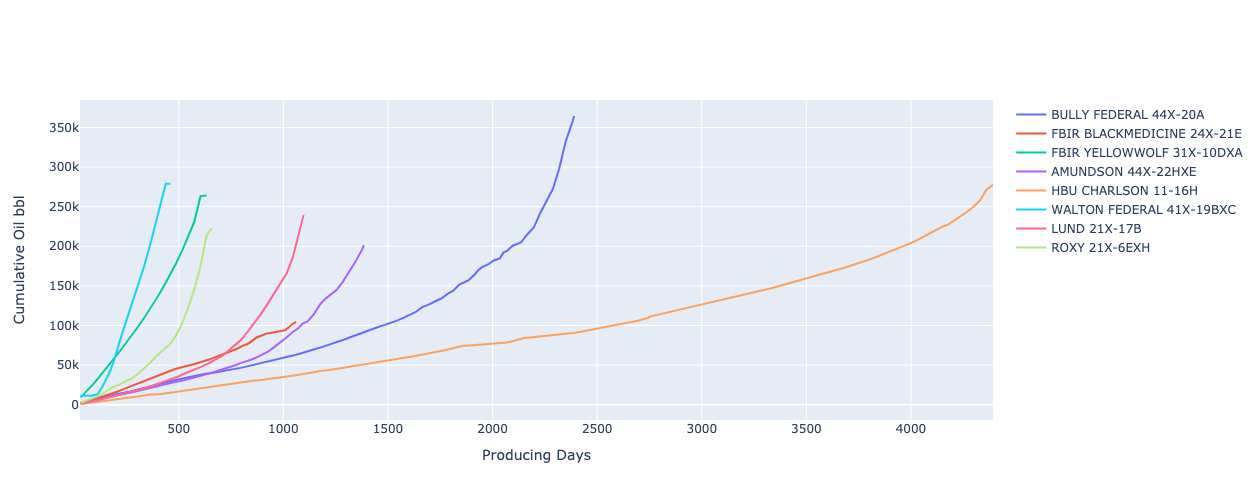

In [11]:
df9 = df_header[df_header['Current_Operator'].str.contains('XTO')].sample(8)
df_prod = df_production.copy()
# ---------------------------------------------------------
STREAM_PLOT(dataframe = df9, 
            production_dataframe = df_prod, 
            material = 'Oil', 
            cumulative = 1, 
            line_width = 2,
            width = 700, height = 500 )

## Water / Oil Ratio Plot

In [12]:
df9 = df_header[df_header['Vintage_Year'] > 2008].sample(1500)
df_prod = df_production[df_production['WOR'].between(0,10)]
# ---------------------------------------------------------
STREAM_PLOT(dataframe = df9, 
            production_dataframe = df_prod, 
            material = 'WOR', 
            cumulative = 0, 
            variable = 'Vintage_Year', 
            variable_dict = {'2008-2012':'grey','2012-2014':'gold','2014-2016':'orange','2016-2018':'red','2018-2020':'blue'},
            averages = 1,
            all_streams = 0,
            width = 800, height = 600 )

KeyError: 'Vintage_Year'

## Production by ~Depth / Pressure

In [ ]:
df9 = df_header.sample(5000)
df_prod = df_production.copy()
# ---------------------------------------------------------
STREAM_PLOT(dataframe = df9, 
            production_dataframe = df_prod, 
            material = 'Oil', 
            cumulative =10, 
            variable = 'Top_Perf', 
            variable_dict = {'0-9000':'grey','9000-1000':'gold','10000-11000':'orange','11000-12000':'red','12000-13000':'blue'},
            averages = 1,
            all_streams = 0,
            width = 800, height = 600 )

## What areas have produced the most oil?

In [ ]:
query = %sql SELECT p.UWI, h.Block, COUNT(DISTINCT p.UWI) AS 'Wells_Per_Block', SUM(p.Oil) AS 'Cumulative_Oil_Per_Block' FROM prod_table_clean p JOIN header_table_clean h ON p.UWI = h.UWI GROUP BY Block ORDER BY Cumulative_Oil_Per_Block desc

df_block = query.DataFrame()
df_block.drop(columns='UWI',inplace=True)
df_block.set_index('Block',inplace=True)
df_block['Cum_Oil_Per_Well_Block'] = df_block['Cumulative_Oil_Per_Block'] / df_block['Wells_Per_Block']
print(len(df_block))
df_block.head()

In [66]:
df_header = df_header.merge(df_block[['Wells_Per_Block','Cumulative_Oil_Per_Block','Cum_Oil_Per_Well_Block']],left_on='Block',right_on='Block')
df_header.sort_values('Cumulative_Oil_Per_Block',inplace=True,ascending=False)
df_header.head()

File_Number           Well_Name Well_Type Well_Status        Location  \
3627        20780  HENDERSON 1-28/33H        OG           A  NENE 28-150-95   
3744        30583    TIPI V 1-24-25TH        OG           A  SESE 13-150-95   
3731        30048    MARLENE 42X-20F2        OG           A  SENE 20-150-95   
3732        30049     MARLENE 42X-20C        OG           A  SENE 20-150-95   
3733        30214   MARLENE 42X-20CXD        OG           A  SENE 20-150-95   

      Latitude  Longitude    Current_Operator Completion_Date Total_Depth  \
3627      47.8     -102.8  QEP ENERGY COMPANY      2012-01-17       20682   
3744      47.8     -102.8  QEP ENERGY COMPANY      2018-04-06       21349   
3731      47.8     -102.9      XTO ENERGY INC      2015-07-25       20917   
3732      47.8     -102.9      XTO ENERGY INC      2015-08-04       20608   
3733      47.8     -102.9      XTO ENERGY INC      2015-07-07       20567   

      ... Perforated_Length Direction        TRS  Section  Township  Range  \
3627  ...            9452.0      NENE  28-150-95       28       150     95   
3744  ...           10202.0      SESE  13-150-95       13       150     95   
3731  ...            9780.0      SENE  20-150-95       20       150     95   
3732  ...            9651.0      SENE  20-150-95       20       150     95   
3733  ...            9583.0      SENE  20-150-95       20       150     95   

      Block  Wells_Per_Block Cumulative_Oil_Per_Block Cum_Oil_Per_Well_Block  
3627  15095              212                 68701132               324061.9  
3744  15095              212                 68701132               324061.9  
3731  15095              212                 68701132               324061.9  
3732  15095              212                 68701132               324061.9  
3733  15095              212                 68701132               324061.9  

[5 rows x 30 columns]

#### Map

In [ ]:
df_sample = df_header[df_header['Top_Perf'].between(9000,11500)]

fig = go.Figure(data=go.Scattergeo(
    lon = df_sample['Longitude'],
    lat = df_sample['Latitude'],
    text = df_sample[['Well_Name','Top_Perf','Current_Operator','Block','Cumulative_Oil_Per_Block']],
    marker = dict(
        color = df_sample['Cumulative_Oil_Per_Block'],
        colorscale = 'rainbow',
        reversescale = True,
        opacity = 0.7,
        size = 7,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
        title = 'Williston Basin Wells',
        geo_scope='usa',width = 1200, height = 800,
    geo = dict()
    )

fig.update_geos(
    center=dict(lon=df_sample['Longitude'].mean(), lat=df_sample['Latitude'].mean()),
    lataxis_range=[df_sample['Latitude'].min(),df_sample['Latitude'].max()], lonaxis_range=[df_sample['Longitude'].min(),df_sample['Longitude'].max()]
               )
  
fig.show()

## What areas have produced the most oil per well?

### Map

In [ ]:
df_sample = df_header[df_header['Top_Perf'].between(9000,11500)]

fig = go.Figure(data=go.Scattergeo(
    lon = df_sample['Longitude'],
    lat = df_sample['Latitude'],
    text = df_sample[['Well_Name','Top_Perf','Current_Operator','Block','Cumulative_Oil_Per_Block','Cum_Oil_Per_Well_Block']],
    marker = dict(
        color = df_sample['Cum_Oil_Per_Well_Block'],
        colorscale = 'rainbow',
        reversescale = True,
        opacity = 0.7,
        size = 7,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
        title = 'Williston Basin Wells',
        geo_scope='usa',width = 1200, height = 800,
    geo = dict()
    )

fig.update_geos(
    center=dict(lon=df_sample['Longitude'].mean(), lat=df_sample['Latitude'].mean()),
    lataxis_range=[df_sample['Latitude'].min(),df_sample['Latitude'].max()], lonaxis_range=[df_sample['Longitude'].min(),df_sample['Longitude'].max()]
               )
  
fig.show()